In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 5

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/30 [>.............................] - ETA: 7s - loss: 1.6341 - accuracy: 0.2422
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.5360 - accuracy: 0.3043 - val_loss: 1.4781 - val_accuracy: 0.3443
Epoch 2/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.4605 - accuracy: 0.3672
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.4324 - accuracy: 0.3420 - val_loss: 1.3796 - val_accuracy: 0.3740
Epoch 3/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.4616 - accuracy: 0.3828
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.3638 - accuracy: 0.3677 - val_loss: 1.3066 - val_accuracy: 0.4117
Epoch 4/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.2991 - accuracy: 0.4375
E

 1/30 [>.............................] - ETA: 0s - loss: 0.6585 - accuracy: 0.7266
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.7664 - accuracy: 0.7019 - val_loss: 0.4816 - val_accuracy: 0.8900
Epoch 29/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7569 - accuracy: 0.6797
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.7706 - accuracy: 0.6915 - val_loss: 0.4795 - val_accuracy: 0.8925
Epoch 30/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7287 - accuracy: 0.7031
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.7469 - accuracy: 0.7129 - val_loss: 0.4665 - val_accuracy: 0.8973
Epoch 31/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7696 - accuracy: 0.7031
Epoch 31

 1/30 [>.............................] - ETA: 0s - loss: 0.6204 - accuracy: 0.8203
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.7549 - val_loss: 0.3489 - val_accuracy: 0.9109
Epoch 56/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7938 - accuracy: 0.6875
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7517 - val_loss: 0.3461 - val_accuracy: 0.9117
Epoch 57/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7285 - accuracy: 0.7344
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.7573 - val_loss: 0.3525 - val_accuracy: 0.8997
Epoch 58/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6000 - accuracy: 0.7656
Epoch 58

 1/30 [>.............................] - ETA: 0s - loss: 0.5999 - accuracy: 0.7734
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.7709 - val_loss: 0.3121 - val_accuracy: 0.9077
Epoch 83/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5682 - accuracy: 0.7969
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7736 - val_loss: 0.3166 - val_accuracy: 0.9069
Epoch 84/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5714 - accuracy: 0.7500
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.7723 - val_loss: 0.3196 - val_accuracy: 0.9045
Epoch 85/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6242 - accuracy: 0.7656
Epoch 85

 1/30 [>.............................] - ETA: 0s - loss: 0.5969 - accuracy: 0.7891
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7945 - val_loss: 0.2913 - val_accuracy: 0.9149
Epoch 110/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5753 - accuracy: 0.7734
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.7827 - val_loss: 0.2860 - val_accuracy: 0.9149
Epoch 111/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5050 - accuracy: 0.8203
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7819 - val_loss: 0.2996 - val_accuracy: 0.9077
Epoch 112/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6088 - accuracy: 0.7734
Ep

Epoch 136/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4408 - accuracy: 0.8281
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5525 - accuracy: 0.7974 - val_loss: 0.2771 - val_accuracy: 0.9197
Epoch 137/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5307 - accuracy: 0.8359
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7926 - val_loss: 0.2795 - val_accuracy: 0.9133
Epoch 138/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4633 - accuracy: 0.8359
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7998 - val_loss: 0.2766 - val_accuracy: 0.9141
Epoch 139/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5410 - accu

Epoch 163/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5606 - accuracy: 0.7734
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.8044 - val_loss: 0.2645 - val_accuracy: 0.9222
Epoch 164/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4749 - accuracy: 0.8359
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.8052 - val_loss: 0.2692 - val_accuracy: 0.9181
Epoch 165/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5469 - accuracy: 0.7656
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.8052 - val_loss: 0.2692 - val_accuracy: 0.9141
Epoch 166/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5492 - accu

Epoch 190/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4328 - accuracy: 0.8594
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.8033 - val_loss: 0.2631 - val_accuracy: 0.9246
Epoch 191/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6185 - accuracy: 0.7578
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.8044 - val_loss: 0.2621 - val_accuracy: 0.9278
Epoch 192/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6217 - accuracy: 0.7578
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.8063 - val_loss: 0.2725 - val_accuracy: 0.9246
Epoch 193/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4876 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 665us/step - loss: 0.2535 - accuracy: 0.9358


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[7.2138698e-04 9.7134960e-01 3.7427261e-03 4.9825876e-06 2.4181396e-02]
1


# 混同行列

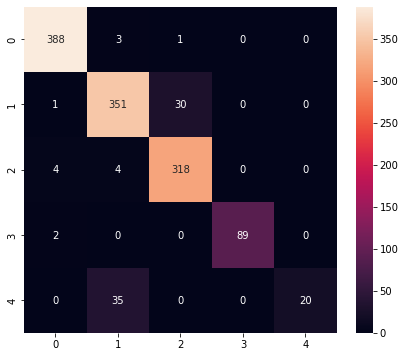

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       392
           1       0.89      0.92      0.91       382
           2       0.91      0.98      0.94       326
           3       1.00      0.98      0.99        91
           4       1.00      0.36      0.53        55

    accuracy                           0.94      1246
   macro avg       0.96      0.85      0.87      1246
weighted avg       0.94      0.94      0.93      1246



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Matheus\AppData\Local\Temp\tmpdsxrlm1l\assets


6464

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.2138803e-04 9.7134960e-01 3.7427295e-03 4.9825976e-06 2.4181373e-02]
1
